# Synthetic Data Generation Notebook for WE03-SVM Regression
### By Dheeraj Mekala

## Introduction:

**Assumed Context:**

I am generating a dataset for E-commerce Shipping Time Prediction with the following features:
-Input columns - Distance to destination, Package weight
-Output column - Delivery time (hours).

## Importing Libraries and setting a seed for consistensy and replication

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)


# Generating the actual data


**Assumed Realtionship**: I will assume a linear realtionship between the time taking the delivery and the ditance and weight of the package.  
**Equation:** Delivery time (hours)=c + a × Distance to destination + b × Package weight
where 
**Coefficients:**
- **c** is the base number of hours it takes after the ordering to begin shipping **(48 hours in this case)**
- **b** is the time incerase or decrease to ship a package with a unit change in weight, I will assume for every pound it takes 15 more mins to reach its destination **(value: 0.25 hours/ pound)**
- **a** is the realtionship between how fast we can cover the distance, in this case I am assuming, we have a constant speed and are covering the distance by a car assuming no traffic and no latency with a standard speed limit of 20 miles/ hour. (**0.05 hours /mile** that is the number of hours it takes to cover one mile of distance).
**Range of input values:**
- **distance:**(to destination) mean: 650, standard deviation = 200
- (Package) **weight:** max: 200 pounds, min: 1 pound, mean: 80 pounds



In [2]:
sample_size = 1000
stdev_distance = 200
mean_distance = 650
min_val_weight = 1
max_val_weight = 200

Using the previously defined values I am trying a to simulate  a randomly shuffeld weight array to simulate differnt sizedm packages and no visible increasing trend in the weight data, and a normally distributed distribution of distance data

In [3]:
weight = np.ndarray.astype(np.linspace(min_val_weight,max_val_weight,sample_size),int)
np.random.shuffle(weight)
df = pd.DataFrame({'distance': np.round(np.random.normal(mean_distance, stdev_distance, sample_size), 1),'weight':weight })
df

,distance,weight
0,911.9,101
1,419.0,163
2,614.5,91
3,347.9,74
4,852.2,49
...,...,...
995,476.8,153
996,549.9,15
997,445.3,181
998,652.1,47


## Calculating the deilvery_time 
**Assumed equation:** [delivery_time] = 48 hours + 0.05 hour/mile * [distance] + 0.25 hour/pound * [weight]

In [4]:
df['delivery_time'] = (48 + (0.05 * df['distance']) + (0.25 * df['weight']))

In [5]:
df['delivery_time'].describe()

count    1000.000000
mean      105.967915
std        17.106011
min        55.540000
25%        93.488750
50%       106.395000
75%       118.067500
max       148.560000
Name: delivery_time, dtype: float64

## Adding noise into the data

In [6]:
df['delivery_time'] = np.round(df['delivery_time'] + np.random.uniform(-10,10, sample_size),0).astype('int')
df

,distance,weight,delivery_time
0,911.9,101,112
1,419.0,163,110
2,614.5,91,110
3,347.9,74,91
4,852.2,49,101
...,...,...,...
995,476.8,153,103
996,549.9,15,76
997,445.3,181,113
998,652.1,47,88


In [7]:
#pip install ipympl

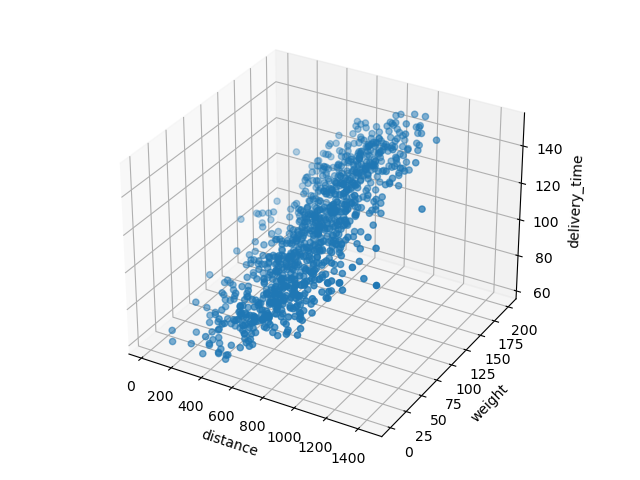

In [8]:
%matplotlib widget 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['distance'], df['weight'], df['delivery_time'])

ax.set_xlabel('distance')
ax.set_ylabel('weight')
ax.set_zlabel('delivery_time')
plt.tight_layout()
plt.show()

**Analysis:**
as we can observe in the graph almost all the points appear to be in a plane when looking from the top. Now looking at the data perpendicular to the assumed plane rather than just seeing a singlr thin line of dotd we see that they are uniformly distributed in a thin strip this is because of the uniform +10, -10 hours we applied earlier.

In [9]:
df.to_csv('./data/delivery_time.csv', index=False)